<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [61]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split


<details>
    <summary>Click here for Solution</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
```

</details>


### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [63]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [64]:
df = pd.read_csv(path)
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


<details>
    <summary>Click here for Solution</summary>

```python
df = pd.read_csv(path, header=None)
print(df.head(10))
```

</details>


Add the headers to the dataframe, as mentioned in the project scenario. 


In [65]:
headers = ["age","gender","bmi" ,"no_of_children","smoker","region","charges"]
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


<details>
    <summary>Click here for Solution</summary>

```python
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
```

</details>


Now, replace the '?' entries with 'NaN' values.


In [66]:
df.replace("?", np.NaN, inplace=True)

<details>
    <summary>Click here for Solution</summary>

```python
df.replace('?', np.nan, inplace = True)
```

</details>


# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


<details>
    <summary>Click here for Solution</summary>

```python
print(df.info())
```

</details>


In [68]:
df["age"] = df["age"].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   float64
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 151.7+ KB


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [69]:
# Check of missing data:

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    #print(column)
    print (missing_data[column].value_counts())
    print("")    

age
False    2767
True        4
Name: count, dtype: int64

gender
False    2771
Name: count, dtype: int64

bmi
False    2771
Name: count, dtype: int64

no_of_children
False    2771
Name: count, dtype: int64

smoker
False    2764
True        7
Name: count, dtype: int64

region
False    2771
Name: count, dtype: int64

charges
False    2771
Name: count, dtype: int64



In [70]:
avg_age = df["age"].astype("float").mean(axis=0)
print("Average of age:", avg_age)

# need to be rounded to 0 decimal places
avg_age_rounded = avg_age.round(0)
avg_age_rounded
print("Average of  rounded age:", avg_age_rounded)

df["age"] = df["age"].replace(np.nan, avg_age_rounded)

Average of age: 39.11709432598482
Average of  rounded age: 39.0


In [77]:
df["smoker"].value_counts()

smoker
0    2208
1     563
Name: count, dtype: int64

In [72]:
type(df["smoker"].value_counts().idxmax())

str

In [73]:
df["smoker"] = df["smoker"].replace(np.nan, "0")

In [74]:
#check if all null data were replaced:

missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    #print(column)
    print (missing_data[column].value_counts())
    print("")    

age
False    2771
Name: count, dtype: int64

gender
False    2771
Name: count, dtype: int64

bmi
False    2771
Name: count, dtype: int64

no_of_children
False    2771
Name: count, dtype: int64

smoker
False    2771
Name: count, dtype: int64

region
False    2771
Name: count, dtype: int64

charges
False    2771
Name: count, dtype: int64



<details>
    <summary>Click here for Solution</summary>

```python
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())
```

</details>


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [90]:
df["charges"] = df["charges"].round(2)
df.reset_index(drop=True, inplace=True)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18.0,2,33.770,1,0,4,1725.55
1,28.0,2,33.000,3,0,4,4449.46
2,33.0,2,22.705,0,0,1,21984.47
3,32.0,2,28.880,0,0,1,3866.86
4,31.0,1,25.740,0,0,4,3756.62


<details>
    <summary>Click here for Solution</summary>

```python
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())
```
</details>


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


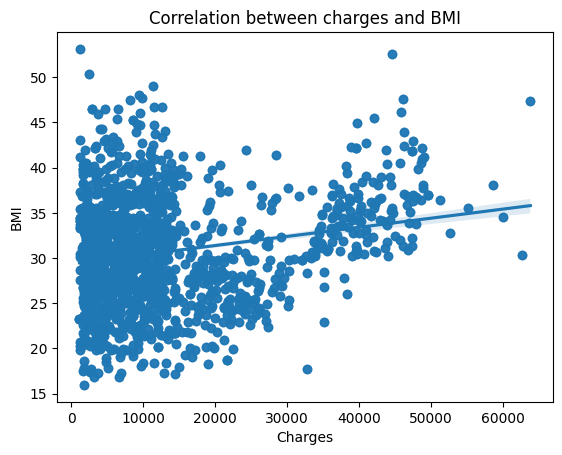

In [91]:
sns.regplot(x = "charges", y = "bmi", data=df)
plt.title('Correlation between charges and BMI')

# Přidání popisu os
plt.xlabel('Charges')
plt.ylabel('BMI')

# Zobrazení grafu
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
```
</details>


Implement the box plot for `charges` with respect to `smoker`.


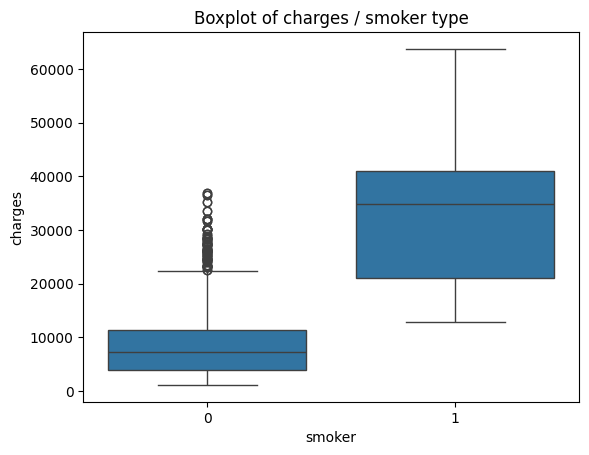

In [92]:
sns.boxplot(x = "smoker", y = "charges", data=df)
plt.title('Boxplot of charges / smoker type')


# Zobrazení grafu
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
sns.boxplot(x="smoker", y="charges", data=df)
```
</details>


Print the correlation matrix for the dataset.


In [96]:
# Výpočet korelace mezi sloupci
correlation_matrix = df.corr()

# Vyfiltrovaní nejvíce korelujících parametrů, kde korelace není rovna 1
max_correlation = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
max_correlation = max_correlation[max_correlation < 1]

# Vytvoření seznamu s názvy parametrů, které nejvíce korelují
most_correlated_parameters = list(max_correlation.index)[:1]

# Vytisknutí výsledků
print("Nejvíce korelující parametry:")
for param in most_correlated_parameters:
    print(param)

# Pokud chcete také zobrazit korelační koeficienty, můžete použít následující:
most_correlated_coefficients = max_correlation.values[:1]
print("Korelační koeficienty:")
for coefficient in most_correlated_coefficients:
    print(coefficient)

Nejvíce korelující parametry:
('smoker', 'charges')
Korelační koeficienty:
0.78914069737051


<details>
    <summary>Click here for Solution</summary>

```python
print(df.corr())
```
</details>


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [99]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X,Y))

0.6227430402464125


<details>
    <summary>Click here for Solution</summary>

```python
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))
```
</details>


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [102]:
Z = df.drop("charges", axis=1)
lm_2 = LinearRegression()
lm_2.fit(Z,Y)
print(lm_2.score(Z,Y))

0.7505888664568174


<details>
    <summary>Click here for Solution</summary>

```python
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))
```
</details>


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [103]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [104]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [105]:
Z = Z.astype(float)
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [107]:
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8453684689627132


<details>
    <summary>Click here for Solution</summary>

```python
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))
```
</details>


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [1]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

NameError: name 'train_test_split' is not defined

<details>
    <summary>Click here for Solution</summary>

```python
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)
```
</details>


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [2]:
RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(x_train, y_train)
Yridge = RidgeModel.predict(x_test)
print(r2_score(y_test,Yridge))

NameError: name 'Ridge' is not defined

<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))
```
</details>


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [115]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8208413195172475


<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))
```
</details>


# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
